In [1]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

current_dir = os.path.abspath(".")
package_path = os.path.join(current_dir, "..")
sys.path.append(package_path)

import charting
from models import simulate_port

data_file_path = os.path.join(current_dir, "..", "data", "Asset Return Data.xlsx")
asset_returns_df = pd.read_excel(data_file_path,index_col=0)
asset_returns_df.head()

,IG Credit Spread,HY Credit Spread,IG Credit Bonds,HY Credit Bonds,3-5Y US Treasury,7-10Y US Treasury,Commodities,Equities,Fed Fund ON,US3M T-Bill
Date,,,,,,,,,,
1976-01-30,0.012924,0.012924,0.019812,0.019812,0.004712,0.005342,-0.022095,0.1152,0.003958,0.003942
1976-02-27,0.002049,0.002049,0.007012,0.007012,0.000222,0.001442,0.033647,-0.0092,0.003958,0.004167
1976-03-31,0.005832,0.005832,0.015962,0.015962,0.005032,0.001592,-0.022318,0.0286,0.003958,0.004142
1976-04-30,-0.002698,-0.002698,-0.004517,-0.004517,0.004843,-0.007647,0.040554,-0.0141,0.004067,0.004092
1976-05-31,0.000225,0.000225,-0.011303,-0.011303,-0.014753,-0.006863,0.062235,-0.0110,0.004583,0.004575


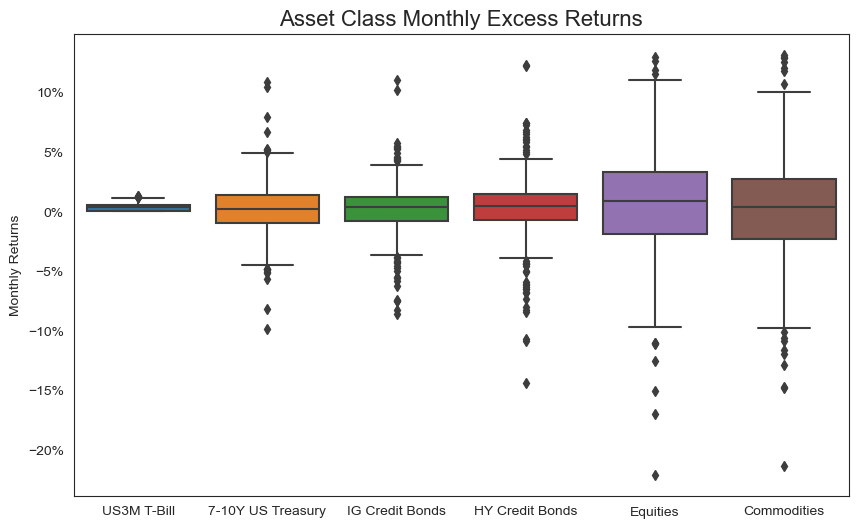

In [2]:
# Full period data boxplot

cash_assets = ['US3M T-Bill', '7-10Y US Treasury', 'IG Credit Bonds', 'HY Credit Bonds', 'Equities', 'Commodities']
asset_returns_df_cash = asset_returns_df[cash_assets].copy()
asset_returns_box = charting.boxplot_monthly_returns(asset_returns_df_cash, figsize=(10,6), title='Asset Class Monthly Excess Returns')

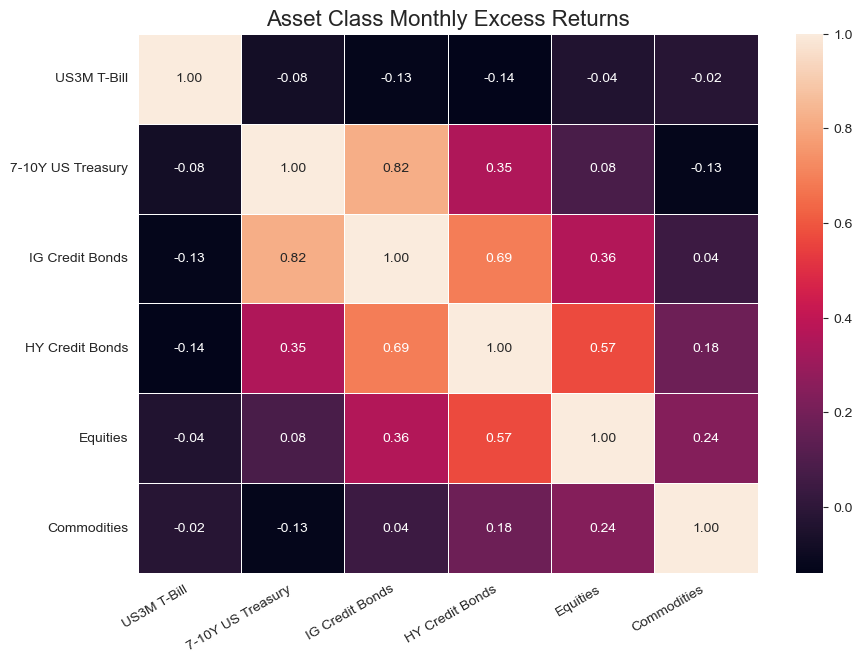

In [3]:
# Full period data correlation matrix

asset_returns_matrix = charting.plot_corr_matrix(asset_returns_df_cash, title='Asset Class Monthly Excess Returns')

In [4]:
# Full period summary stats table

summary = charting.summary_stats_table(asset_returns_df_cash)
summary

,US3M T-Bill,7-10Y US Treasury,IG Credit Bonds,HY Credit Bonds,Equities,Commodities
Mean,0.36%,0.18%,0.21%,0.29%,0.56%,0.19%
Volatility,0.30%,2.13%,1.97%,2.47%,4.38%,4.31%
Median,0.37%,0.18%,0.36%,0.48%,0.90%,0.38%
Min,-0.00%,-9.86%,-8.61%,-14.37%,-22.12%,-21.34%
Max,1.29%,10.88%,11.01%,12.32%,13.01%,13.15%
Skew,0.70,0.14,-0.21,-0.58,-0.55,-0.31
Kurtosis,0.08,3.03,4.89,6.01,1.80,1.55


In [5]:
# Portfolio simulation

asset_ranges = {'US3M T-Bill': [0.0, 0.1], '7-10Y US Treasury': [0.15, 0.35],
                'IG Credit Bonds': [0.15, 0.30], 'HY Credit Bonds': [0.10, 0.30],
                'Equities': [0.10, 0.25], 'Commodities': [0.0, 0.10]}

sim_ports = simulate_port.portfolio_randomizer(asset_ranges, iterations=100000)
sim_ports

,US3M T-Bill,7-10Y US Treasury,IG Credit Bonds,HY Credit Bonds,Equities,Commodities
0,0.035169,0.296221,0.222206,0.183087,0.205540,0.057778
1,0.081310,0.348161,0.204710,0.116705,0.206781,0.042333
2,0.003597,0.313241,0.165644,0.222673,0.245648,0.049196
3,0.076870,0.202740,0.175681,0.276853,0.207703,0.060154
4,0.047225,0.319730,0.175603,0.177310,0.247303,0.032829
...,...,...,...,...,...,...
310,0.066892,0.337888,0.197435,0.191397,0.124998,0.081390
311,0.089989,0.181569,0.158501,0.241193,0.247279,0.081468
312,0.034135,0.268455,0.224957,0.222347,0.233406,0.016701
313,0.073852,0.195168,0.151320,0.281848,0.245469,0.052344


In [6]:
# Full series returns simulation

full_hist_sim = simulate_port.portfolio_returns(sim_ports, asset_returns_df_cash)

In [7]:
hist_sim = full_hist_sim.copy()
#hist_sim = hist_sim[hist_sim['Date'] > '2010-01-01']
hist_sim = hist_sim.set_index('Date')
hist_sim = hist_sim * 100

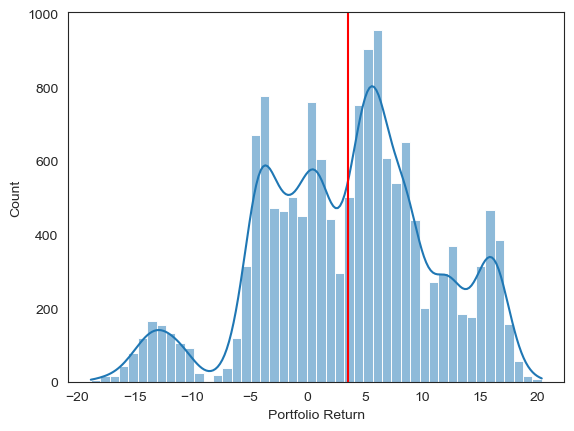

In [8]:
res = sns.histplot(hist_sim['Portfolio Return'], kde=True)
plt.axvline(x=hist_sim['Portfolio Return'].mean(),color='red')

In [9]:
hist_sim['Portfolio Return'].mean()

3.5205490683499794

In [10]:
hist_sim['Portfolio Return'].describe()

count    15120.000000
mean         3.520549
std          7.500272
min        -18.841891
25%         -1.756305
50%          4.244296
75%          8.400038
max         20.390140
Name: Portfolio Return, dtype: float64

In [11]:
hist_sim['Portfolio Return'].mean() / hist_sim['Portfolio Return'].std()

0.46938950377087507

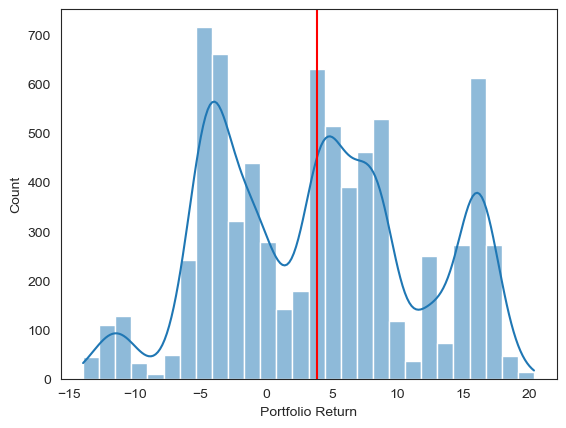

In [12]:
hist_sim = full_hist_sim.copy()
hist_sim = hist_sim[hist_sim['Date'] < '2000-01-01']
hist_sim = hist_sim.set_index('Date')
hist_sim = hist_sim * 100

res = sns.histplot(hist_sim['Portfolio Return'], kde=True)
plt.axvline(x=hist_sim['Portfolio Return'].mean(),color='red')

In [13]:
hist_sim['Portfolio Return'].mean()

3.8722737392097906

In [14]:
hist_sim['Portfolio Return'].describe()

count    7560.000000
mean        3.872274
std         7.820269
min       -13.954708
25%        -3.188156
50%         4.131964
75%         8.856717
max        20.390140
Name: Portfolio Return, dtype: float64

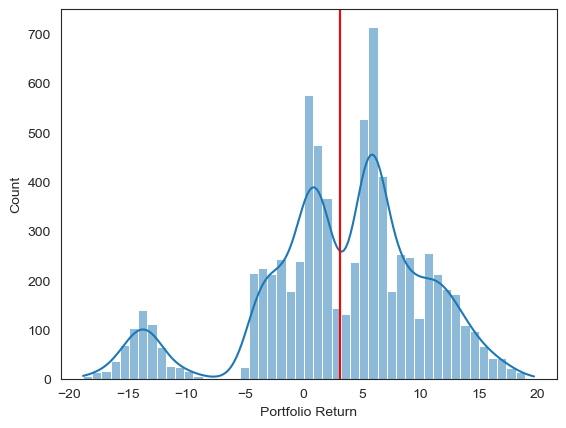

In [15]:
hist_sim = full_hist_sim.copy()
hist_sim = hist_sim[hist_sim['Date'] > '2000-01-01']
hist_sim = hist_sim.set_index('Date')
hist_sim = hist_sim * 100

res = sns.histplot(hist_sim['Portfolio Return'], kde=True)
plt.axvline(x=hist_sim['Portfolio Return'].mean(),color='red')

In [16]:
hist_sim['Portfolio Return'].mean()

3.168824397490168

In [17]:
hist_sim['Portfolio Return'].describe()

count    7560.000000
mean        3.168824
std         7.149234
min       -18.841891
25%        -0.138087
50%         4.439604
75%         7.655990
max        19.712712
Name: Portfolio Return, dtype: float64